# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat = pd.read_csv('sat_2017.csv')
act = pd.read_csv('act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

The sat dataset is showing statistics related to the SAT test for each state in the U.S. for the SAT. The SAT is a standardized test widely used for college admissions in the United States. The SAT has four sections: Reading, Writing and Language, Math (no calculator), and Math (calculator allowed).

The total test score is displayed as 'Total'. In addition, the 'Participation' column relates to the percentage of a population within the state, that participated in taking the test. The 'Math' and 'Evidence-Based Reading and Writing' pertain to the scores in mathematics and reading/writing, respectivelly. We can prove this hypothesis by combining both math and english values to yield the final test score. All values in the sat dataset are integers.

The act dataset is showing statistics related to the ACT test for each state in the U.S. The ACT is a standardized test used for college admissions in the United States that covers four academic skill areas: English, mathematics, reading, and science reasoning. The main four ACT test sections are individually scored on a scale of 1–36, and a composite score is the rounded whole number average of the four sections.

Each column is related to an individual score pertaining to each individual topic, that is, 'English' refers to a score from 1-36 for English, 'Science' refers to a score from 1-36 for Science, etc. All Subject test scores range from 1 to 36; all scores are floats.
The 'Participation' is related to the percentage of a population within a state that are able to take the test.

#### 4a. Does the data look complete? 

 Answer: 
 
 For both the ACT and SAT dataset, there are no missing (null) values. However, in the SAT dataset there are missing partitions of columns pertaining to the individual scores for all 4 categories. Specifically, The SAT has four sections: Reading, Writing and Language, Math (no calculator), and Math (calculator allowed). In our dataset, Reading and Writing and Language have been combined into Column 2 as an integer. While Math scores of calculator and without calculator have been combined into column 3.


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
print(sat.min())
print('\n')
print(sat.max())
print('\n')
print(act.min())
print('\n')
print(act.max())

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object


State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object


State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object


State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object


Answer:

The minimum total value of the SAT dataset is 950. The maximum value is 1295.
The minumum composite value of the ACT dataset is 17.8. the maximum value is 25.5.
In ACT State #51 , the composite has an x in its integer.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
act.loc[act['State'] == 'Wyoming', ['Composite']] 

,Composite
51,20.2x


In [7]:
#code

#remove x from wyoming
act.loc[act['State'] == 'Wyoming', ['Composite']] = float(20.2)

#add the national average to sat
#state = 'National'
#sat_participation = 'NaN'
#sat_ERW = 533
#sat_math = 527
#sat_total = 1060
#row = [state, sat_participation, sat_ERW, sat_math, sat_total]
#sat.loc[-1] = row
#sat.index = sat.index + 1 #shifting index
#sat.sort_index(inplace = True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code
sat.info()
print('\n')
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null 

What did you learn?
- Do any of them seem odd? 
- Which ones are not as they should be? 

Answer:
- Do any of them seem odd?  

State should be a string for both.
Participation should be a float (remove the % symbol).
Composite should be a float for ACT.
- Which ones are not as they should be? 

The State, Participation, and Composite rows.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#code
def percent_to_float(x):
    return float(x.strip('%'))/100

#sat['Participation'] = sat['Participation'].str.rstrip('%').astype('float') / 100.0
#act['Participation'] = act['Participation'].str.rstrip('%').astype('float') / 100.0

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
#code
sat['Participation'] = sat['Participation'].apply(percent_to_float)
act['Participation'] = act['Participation'].apply(percent_to_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
#code
act['Composite'] = act['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [12]:
#Code:
act.info()
print('\n')
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math            

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [14]:
act.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [15]:
#code

#make everything lowercase
sat.columns = sat.columns.str.lower()
act.columns = act.columns.str.lower()

# The .rename method

sat.rename(columns={
    'participation' : 'participation_sat_2017',
    'evidence-based reading and writing' : 'ebrw_sat_2017',
    'math' : 'math_sat_2017',
    'total' : 'total_sat_2017'
}, inplace=True)

act.rename(columns={
    'math' : 'math_act_2017',
    'english' : 'english_act_2017',
    'reading' : 'reading_act_2017',
    'science' : 'science_act_2017',
    'participation' : 'participation_act_2017',
    'composite' : 'composite_act_2017',
    'state' : 'state_act'
}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|one of the 50 U.S. states of the United States| 
|participation_SAT / participation_ACT|float|ACT/SAT|percentage of students in the class of {year} that took the specified test (units percent to two decimal places 98.10 means 98.1%)| 
|ebrw_sat|int|SAT|scores for evidence-based reading and writing (total score = 800)| 
|math_sat|int|SAT|scores for mathematics (total score = 800)|
|total_sat|int|SAT|total score for the SAT out of 1600 points| 
|english_act|float|ACT|english scores. (scaled from 1-36)| 
|math_act|float|ACT|mathematics scores. (scaled from 1-36)|
|reading_act|float|ACT|reading scores. (scaled from 1-36)|
|science_act|float|ACT|science scores. (scaled from 1-36)|
|composite_act|float|ACT|total score. (average of four test scores, rounded to the nearest whole number. Fractions less than one-half are rounded down; fractions one-half or more are rounded up.)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [16]:
#code
act.drop([0], inplace = True)
act.index = act.index - 1 #shifting index
act.sort_index(inplace = True)

In [17]:
act.head()

,state_act,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code:
merged = pd.concat([sat, act], axis=1)
del merged['state_act']
merged

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code
merged.to_csv('combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [20]:
sat2018 = pd.read_csv('sat_2018.csv')
act2018 = pd.read_csv('act_2018.csv')

In [21]:
sat2018.info()
print('\n')
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [22]:
#percent to float
sat2018['Participation'] = sat2018['Participation'].apply(percent_to_float)
act2018['Participation'] = act2018['Participation'].apply(percent_to_float)

#remove duplicate
act2018.drop([20], inplace = True)
act2018 = act2018.reset_index(drop=True)

#make everything lowercase
sat2018.columns = sat2018.columns.str.lower()
act2018.columns = act2018.columns.str.lower()

# The .rename method

sat2018.rename(columns={
    'participation' : 'participation_sat_2018',
    'evidence-based reading and writing' : 'ebrw_sat_2018',
    'math' : 'math_sat_2018',
    'total' : 'total_sat_2018'
}, inplace=True)

act2018.rename(columns={
    'participation' : 'participation_act_2018',
    'composite' : 'composite_act_2018',
}, inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [23]:
merged1 = pd.concat([sat2018, act2018], axis=1)
del merged1['state']
merged1

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,0.06,595,571,1166,1.00,19.1
1,0.43,562,544,1106,0.33,20.8
2,0.29,577,572,1149,0.66,19.2
3,0.05,592,576,1169,1.00,19.4
4,0.60,540,536,1076,0.27,22.7
5,1.00,519,506,1025,0.30,23.9
6,1.00,535,519,1053,0.26,25.6
7,1.00,505,492,998,0.17,23.8
8,0.92,497,480,977,0.32,23.6
9,0.56,550,549,1099,0.66,19.9


In [24]:
sat_act_2017_2018 = pd.concat([merged, merged1], axis = 1)
sat_act_2017_2018

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.56,550,549,1099,0.66,19.9


# 2019 Datasets

In [25]:
'''
Do the same thing for the 2019 datasets
'''
sat2019 = pd.read_csv('sat_2019.csv', encoding = "ISO-8859-1")
act2019 = pd.read_csv('act_2019.csv')

In [26]:
#remove duplicates and unnecesary rows

act2019.drop([51], inplace = True)
act2019 = act2019.reset_index(drop=True)

sat2019.drop([47], inplace = True)
sat2019.drop([39], inplace = True)
sat2019 = sat2019.reset_index(drop = True)

#percent to float
sat2019['Participation Rate'] = sat2019['Participation Rate'].apply(percent_to_float)
act2019['Participation'] = act2019['Participation'].apply(percent_to_float)

#make everything lowercase
sat2019.columns = sat2019.columns.str.lower()
act2019.columns = act2019.columns.str.lower()

# The .rename method

sat2019.rename(columns={
    'participation rate' : 'participation_sat_2019',
    'ebrw' : 'ebrw_sat_2019',
    'math' : 'math_sat_2019',
    'total' : 'total_sat_2019'
}, inplace=True)

act2019.rename(columns={
    'participation' : 'participation_act_2019',
    'composite' : 'composite_act_2019',
}, inplace=True)

In [27]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   participation_act_2019  51 non-null     float64
 2   composite_act_2019      51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [28]:
merged2 = pd.concat([sat2019, act2019], axis=1)
del merged2['state']
merged2

,participation_sat_2019,ebrw_sat_2019,math_sat_2019,total_sat_2019,participation_act_2019,composite_act_2019
0,0.07,583,560,1143,1.00,18.9
1,0.41,556,541,1097,0.38,20.1
2,0.31,569,565,1134,0.73,19.0
3,0.06,582,559,1141,1.00,19.3
4,0.63,534,531,1065,0.23,22.6
5,1.00,518,506,1024,0.27,23.8
6,1.00,529,516,1046,0.22,25.5
7,1.00,499,486,985,0.13,24.1
8,0.94,495,480,975,0.32,23.5
9,1.00,516,483,999,0.54,20.1


In [29]:
final = pd.concat([sat_act_2017_2018, merged2], axis = 1)
final.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
participation_sat_2017,0.05,0.38,0.3,0.03,0.53,0.11,1,1,1,0.83,...,0.03,0.05,0.62,0.03,0.6,0.65,0.64,0.14,0.03,0.03
ebrw_sat_2017,593,547,563,614,531,606,530,503,482,520,...,612,623,513,624,562,561,541,558,642,626
math_sat_2017,572,533,553,594,524,595,512,492,468,497,...,603,604,507,614,551,541,534,528,649,604
total_sat_2017,1165,1080,1116,1208,1055,1201,1041,996,950,1017,...,1216,1228,1020,1238,1114,1102,1075,1086,1291,1230
participation_act_2017,1,0.65,0.62,1,0.31,1,0.31,0.18,0.32,0.73,...,0.8,1,0.45,1,0.29,0.29,0.29,0.69,1,1
english_act_2017,18.9,18.7,18.6,18.9,22.5,20.1,25.5,24.1,24.4,19,...,20.7,19.5,19.5,19.5,23.3,23.5,20.9,20,19.7,19.4
math_act_2017,18.4,19.8,19.8,19,22.7,20.3,24.6,23.4,23.5,19.4,...,21.5,19.2,20.7,19.9,23.1,23.3,21.9,19.4,20.4,19.8
reading_act_2017,19.7,20.4,20.1,19.7,23.1,21.2,25.6,24.8,24.9,21,...,22.3,20.1,21.1,20.8,24.4,24.6,22.1,21.2,20.6,20.8
science_act_2017,19.4,19.9,19.8,19.5,22.2,20.9,24.6,23.6,23.5,19.4,...,22,19.9,20.9,20.6,23.2,23.5,22,20.5,20.9,20.6


In [30]:
final.to_csv('final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [31]:
#Code:
final.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,23.0,23.00,23.0,23.0,23,23.0,23.0,23.0,23.00,23.0,...,23.00,23.0,23.0,23.0,23.0,23.0,23.00,23,23.00,23.00
unique,20.0,21.00,22.0,20.0,21,20.0,18.0,18.0,18.00,22.0,...,21.00,21.0,19.0,18.0,22.0,20.0,20.00,23,18.00,18.00
top,1.0,0.38,19.8,1.0,531,1.0,1.0,1.0,0.32,19.4,...,0.03,1.0,20.7,1.0,24.1,23.5,0.24,1086,0.03,0.03
freq,3.0,2.00,2.0,3.0,2,3.0,3.0,3.0,3.00,2.0,...,3.00,3.0,3.0,3.0,2.0,2.0,2.00,1,3.00,3.00


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [32]:
#code

def std_dev(xs):
    mean = np.sum(xs) / len(xs)   # mean
    var  = np.sum((x - mean)**2 for x in xs) / len(xs)  # variance
    std  = np.sqrt(var)  # standard deviation
    
    return std

In [33]:
#check  
# creating a simple data-set 
sample = [0.5,0.7,0.3,0.2] 

print(std_dev(sample))
print(np.std(sample))

0.19202864369671518
0.19202864369671518


<ipython-input-32-afe6a91ac381>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  var  = np.sum((x - mean)**2 for x in xs) / len(xs)  # variance


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
#Code:
{col.name:std_dev(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

<ipython-input-32-afe6a91ac381>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  var  = np.sum((x - mean)**2 for x in xs) / len(xs)  # variance


{'participation_sat_2017': 0.3492907076664507,
 'ebrw_sat_2017': 45.21697020437866,
 'math_sat_2017': 84.07255521608297,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2017': 0.3182417575123181,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 3.151107895464408,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2018': 0.3694661922353941,
 'ebrw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433,
 'participation_act_2018': 0.3370173582041031,
 'composite_act_2018': 2.090779082141178,
 'participation_sat_2019': 0.3836584048685726,
 'ebrw_sat_2019': 45.792378682545134,
 'math_sat_2019': 50.78521461840036,
 'total_sat_2019': 96.24027185617864,
 'participation_act_2019': 0.3417582373703047,
 'composite_act_2019': 2.1729011535959777}

In [35]:
final.describe()

,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,participation_sat_2019,ebrw_sat_2019,math_sat_2019,total_sat_2019,participation_act_2019,composite_act_2019
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,...,556.235294,1120.019608,0.617255,21.496078,0.490588,560.803922,552.196078,1113.078431,0.586667,21.464706
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,...,47.772623,94.155083,0.340371,2.111583,0.387476,46.248035,51.290553,97.197910,0.345159,2.194523
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,...,480.000000,977.000000,0.070000,17.700000,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,...,522.500000,1057.500000,0.285000,19.950000,0.055000,527.500000,511.500000,1038.000000,0.245000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,0.660000,21.300000,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,...,593.500000,1204.000000,1.000000,23.650000,0.820000,612.000000,599.000000,1210.000000,1.000000,23.700000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,25.600000,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


In [36]:
{col.name:np.std(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

{'participation_sat_2017': 0.3492907076664507,
 'ebrw_sat_2017': 45.21697020437866,
 'math_sat_2017': 84.07255521608297,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2017': 0.3182417575123181,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 3.151107895464408,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2018': 0.3694661922353942,
 'ebrw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433,
 'participation_act_2018': 0.33701735820410317,
 'composite_act_2018': 2.090779082141178,
 'participation_sat_2019': 0.3836584048685726,
 'ebrw_sat_2019': 45.792378682545134,
 'math_sat_2019': 50.78521461840036,
 'total_sat_2019': 96.24027185617864,
 'participation_act_2019': 0.3417582373703047,
 'composite_act_2019': 2.172901153595978}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

Our answer is the same as np.std()'s method.
While the pandas.describe() output is slightly different than ours, neither is technically incorrect, with our function using a similar mathematical property of numpy.std. There is approximately an ~3.5% relative difference in results. This is because Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# Which states have the highest and lowest participation rates?

In [37]:
#code

highest_SAT_rate_2017 = final[['state','participation_sat_2017']].sort_values(by = 'participation_sat_2017', 
                                                                     ascending = False)
highest_SAT_rate_2017.head()
#the highest states are District of Columbia, Michigan, Conneticut, and Delaware

,state,participation_sat_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [38]:
lowest_SAT_rate_2017 = final[['state','participation_sat_2017']].sort_values(by = 'participation_sat_2017', 
                                                                     ascending = True)
lowest_SAT_rate_2017.head()
#each state with the highest act_participation rates have shown up as some of the lowest in terms of sat_participation. 

,state,participation_sat_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [39]:
highest_ACT_rate_2017 = final[['state','participation_act_2017']].sort_values(by = 'participation_act_2017', 
                                                                     ascending = False)
highest_ACT_rate_2017.head(17)
#17 of the 50 states are tied for highest participation rates. None of the states with highest sat participation rates were included.

,state,participation_act_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


In [40]:
lowest_ACT_rate_2017 = final[['state','participation_act_2017']].sort_values(by = 'participation_act_2017', 
                                                                     ascending = True)
lowest_ACT_rate_2017.head()
#much higher mean participation rates than for SAT. none <0.18 except one exception

,state,participation_act_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


**Clearly, high levels of participation in ACT are negatively correlated with participation in SAT. We can surmise that the academic culture of these states plays a large part in the overall participation rates.**

In [41]:
highest_SAT_rate_2018 = final[['state','participation_sat_2018']].sort_values(by = 'participation_sat_2018', 
                                                                     ascending = False)
highest_ACT_rate_2018 = final[['state','participation_act_2018']].sort_values(by = 'participation_act_2018', 
                                                                     ascending = False)
lowest_SAT_rate_2018 = final[['state','participation_sat_2018']].sort_values(by = 'participation_sat_2018', 
                                                                     ascending = True)
lowest_ACT_rate_2018 = final[['state','participation_act_2018']].sort_values(by = 'participation_act_2018', 
                                                                     ascending = True)
highest_SAT_rate_2019 = final[['state','participation_sat_2019']].sort_values(by = 'participation_sat_2019', 
                                                                     ascending = False)
highest_ACT_rate_2019 = final[['state','participation_act_2019']].sort_values(by = 'participation_act_2019', 
                                                                     ascending = False)
lowest_SAT_rate_2019 = final[['state','participation_sat_2019']].sort_values(by = 'participation_sat_2019', 
                                                                     ascending = True)
lowest_ACT_rate_2019 = final[['state','participation_act_2019']].sort_values(by = 'participation_act_2019', 
                                                                     ascending = True)

In [42]:
highest_SAT_rate_2018.head()
#conneticut and deleware still in the top 5.

,state,participation_sat_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [43]:
lowest_SAT_rate_2018.head()
#north dakota remains from last year. it is the only one with <0.03, a -1 change from last year

,state,participation_sat_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [44]:
highest_ACT_rate_2018.head()
#nearly a carbon copy of last year. still with 17 participations in 1.00. We can infer now that ACT rates are more stable.

,state,participation_act_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


In [45]:
lowest_ACT_rate_2018.head()
#no participation rates <0.15 with one exception. much higher than SAT

,state,participation_act_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


# Which states have the highest and lowest mean total/composite scores?

In [46]:
highest_SAT_scores_2017 = final[['state','total_sat_2017']].sort_values(by = 'total_sat_2017', 
                                                                     ascending = False)
highest_ACT_scores_2017 = final[['state','composite_act_2017']].sort_values(by = 'composite_act_2017', 
                                                                     ascending = False)
lowest_SAT_scores_2017 = final[['state','total_sat_2017']].sort_values(by = 'total_sat_2017', 
                                                                     ascending = True)
lowest_ACT_scores_2017 = final[['state','composite_act_2017']].sort_values(by = 'composite_act_2017', 
                                                                     ascending = True)
highest_SAT_scores_2018 = final[['state','total_sat_2018']].sort_values(by = 'total_sat_2018', 
                                                                     ascending = False)
highest_ACT_scores_2018 = final[['state','composite_act_2018']].sort_values(by = 'composite_act_2018', 
                                                                     ascending = False)
lowest_SAT_scores_2018 = final[['state','total_sat_2018']].sort_values(by = 'total_sat_2018', 
                                                                     ascending = True)
lowest_ACT_scores_2018 = final[['state','composite_act_2018']].sort_values(by = 'composite_act_2018', 
                                                                     ascending = True)
lowest_SAT_scores_2019 = final[['state','total_sat_2019']].sort_values(by = 'total_sat_2019', 
                                                                     ascending = True)
lowest_ACT_scores_2019 = final[['state','composite_act_2019']].sort_values(by = 'composite_act_2019', 
                                                                     ascending = True)

In [47]:
highest_SAT_scores_2017.head()

,state,total_sat_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [48]:
highest_SAT_scores_2018.head()

,state,total_sat_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [49]:
lowest_SAT_scores_2017.head()

,state,total_sat_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [50]:
lowest_SAT_scores_2018.head()
# on average SAT scores did improve. 3 of the same states are in the lowest 5 once again

,state,total_sat_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


let's check the ACT data now

In [51]:
highest_ACT_scores_2017.head()

,state,composite_act_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [52]:
highest_ACT_scores_2018.head()
#on average, scores have improved. Massachusetts and New Hampshire are near top universities. Most states are north-eastern.

,state,composite_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


In [53]:
lowest_ACT_scores_2017.head()

,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [54]:
lowest_ACT_scores_2018.head()
#very consistent with little deviation. will need to connect with participation to ensure high enough sample size.

,state,composite_act_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


# Do any states with 100% participation on a given test have a rate change year-to-year?

In [55]:
hundred_percent = final.loc[(final['participation_sat_2017'] == 1) | (final['participation_sat_2018'] == 1) | (final['participation_sat_2019'] == 1)]
hundred_percent = hundred_percent.filter(['state','participation_sat_2017', 'participation_sat_2018', 'participation_sat_2019'])
hundred_percent

,state,participation_sat_2017,participation_sat_2018,participation_sat_2019
5,Colorado,0.11,1.00,1.00
6,Connecticut,1.00,1.00,1.00
7,Delaware,1.00,1.00,1.00
8,District of Columbia,1.00,0.92,0.94
9,Florida,0.83,0.56,1.00
12,Idaho,0.93,1.00,1.00
13,Illinois,0.09,0.99,1.00
22,Michigan,1.00,1.00,1.00
39,Rhode Island,0.71,0.97,1.00


**As we can see above, all states except Connecticut and Deleware have experienced rate changes. 
Colorado and Illinois are interesting, as they have experienced an an extremely rapid shift to 1.00 participation rates in the SATs.  going from 0.11 and 0.09 respectively, to 1 and 0.99 within one year.**

In [56]:
hundred_percent_act = final.loc[(final['participation_act_2017'] == 1) | (final['participation_act_2018'] == 1) | (final['participation_act_2019'] == 1)]
hundred_percent_act = hundred_percent_act.filter(['state','participation_act_2017', 'participation_act_2018', 'participation_act_2019'])
hundred_percent_act

,state,participation_act_2017,participation_act_2018,participation_act_2019
0,Alabama,1.00,1.00,1.00
3,Arkansas,1.00,1.00,1.00
5,Colorado,1.00,0.30,0.27
17,Kentucky,1.00,1.00,1.00
18,Louisiana,1.00,1.00,1.00
23,Minnesota,1.00,0.99,0.95
24,Mississippi,1.00,1.00,1.00
25,Missouri,1.00,1.00,0.82
26,Montana,1.00,1.00,1.00
27,Nebraska,0.84,1.00,1.00


**Colorado has experienced the most rapid rate change.
States like Minnesota have been fairly stable, while Missiouri has dropped 0.18 points in one year.
Ohio and Nebraska have gone up to 1.0 participation within one year.
South Carolina has recently dropped considerably in participation rates (0.22 points).
Other than that, all states have been stable at 1.0.**

# Do any states  have >50% participation on both tests either year?

In [57]:
over_50_2017 = final.loc[(final['participation_sat_2017'] >= 0.50) & (final['participation_act_2017'] >= 0.50)] 
over_50_2018 = final.loc[(final['participation_sat_2018'] >= 0.50) & (final['participation_act_2018'] >= 0.50)] 
over_50_2019 = final.loc[(final['participation_sat_2019'] >= 0.50) & (final['participation_act_2019'] >= 0.50)] 

In [58]:
over_50_2017 = over_50_2017.filter(['state', 'participation_sat_2017', 'participation_act_2017'])
over_50_2017

,state,participation_sat_2017,participation_act_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90
40,South Carolina,0.50,1.00


In [59]:
over_50_2018 = over_50_2018.filter(['state', 'participation_sat_2018', 'participation_act_2018'])
over_50_2018

,state,participation_sat_2018,participation_act_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [60]:
over_50_2019 = over_50_2019.filter(['state', 'participation_sat_2019', 'participation_act_2019'])
over_50_2019

,state,participation_sat_2019,participation_act_2019
9,Florida,1.00,0.54
11,Hawaii,0.54,0.80
33,North Carolina,0.51,1.00
40,South Carolina,0.68,0.78


**Florida, Goergia, Hawaii, and North/South Carolina have both participation rates in the ACT and SAT over 50%**

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

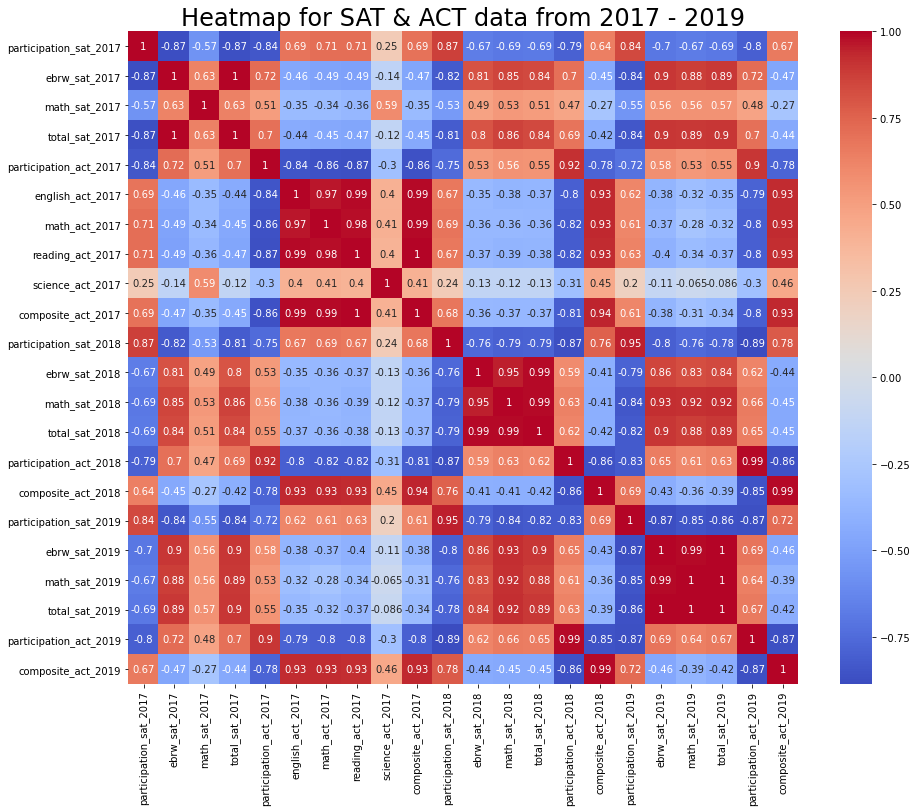

In [61]:
import seaborn as sns

plt.figure(figsize=(15, 12))

# add title to plot
plt.title("Heatmap for SAT & ACT data from 2017 - 2019", fontsize = 24)
sns.heatmap(final.corr(), annot=True, cmap='coolwarm');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.subplots_adjust(hspace = 0.5)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

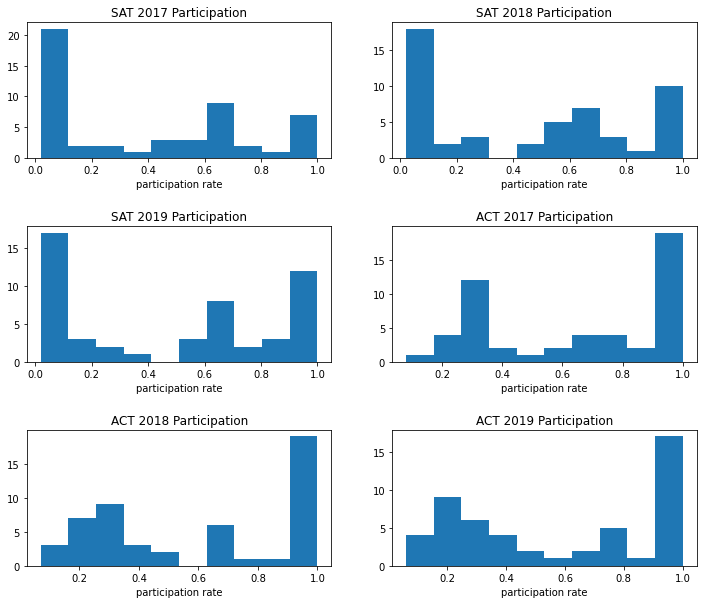

In [63]:
# Code
subplot_histograms(final,
                   list_of_columns=['participation_sat_2017', 'participation_sat_2018','participation_sat_2019', 
                           'participation_act_2017', 'participation_act_2018', 'participation_act_2019'],
                   
                   list_of_titles=['SAT 2017 Participation', 'SAT 2018 Participation', 'SAT 2019 Participation',
                                   'ACT 2017 Participation', 'ACT 2018 Participation', 'ACT 2019 Participation'], 
                   
                   list_of_xlabels=['participation rate', 'participation rate', 'participation rate', 'participation rate', 'participation rate', 'participation rate'])

**Participation distributions are similar across years. SAT has a higher amount of states with very low participation rates, and ACT has a higher amount of states with very high participation rates**

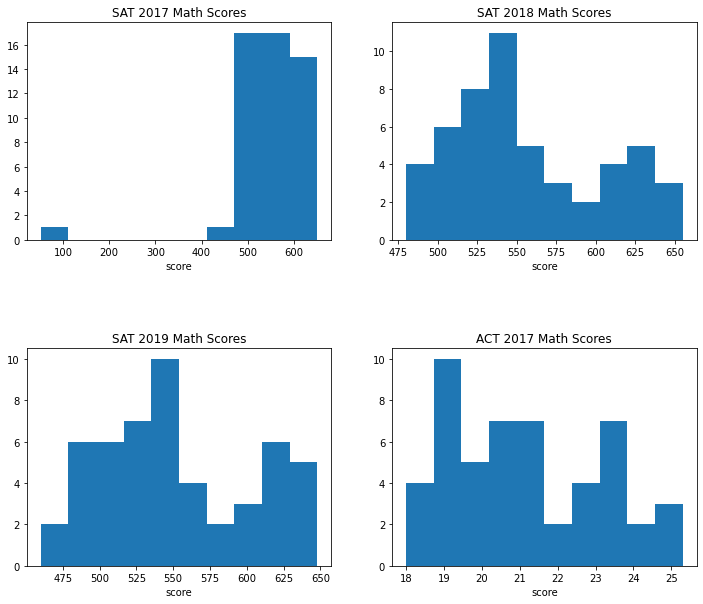

In [64]:
subplot_histograms(final, 
                   list_of_columns=['math_sat_2017', 'math_sat_2018', 'math_sat_2019',
                                    'math_act_2017'], 
                   list_of_titles=['SAT 2017 Math Scores', 'SAT 2018 Math Scores', 'SAT 2019 Math Scores',
                                   'ACT 2017 Math Scores'], 
                   list_of_xlabels=['score', 'score', 'score', 'score']
                  )

**The ACT math scores are more evenly distributed than the SAT scores in 2017. For ACT, most states have a math score between 19-19.5. For SAT, most states have scores between 526 - 550.**

In [65]:
final.columns

Index(['state', 'participation_sat_2017', 'ebrw_sat_2017', 'math_sat_2017',
       'total_sat_2017', 'participation_act_2017', 'english_act_2017',
       'math_act_2017', 'reading_act_2017', 'science_act_2017',
       'composite_act_2017', 'participation_sat_2018', 'ebrw_sat_2018',
       'math_sat_2018', 'total_sat_2018', 'participation_act_2018',
       'composite_act_2018', 'participation_sat_2019', 'ebrw_sat_2019',
       'math_sat_2019', 'total_sat_2019', 'participation_act_2019',
       'composite_act_2019'],
      dtype='object')

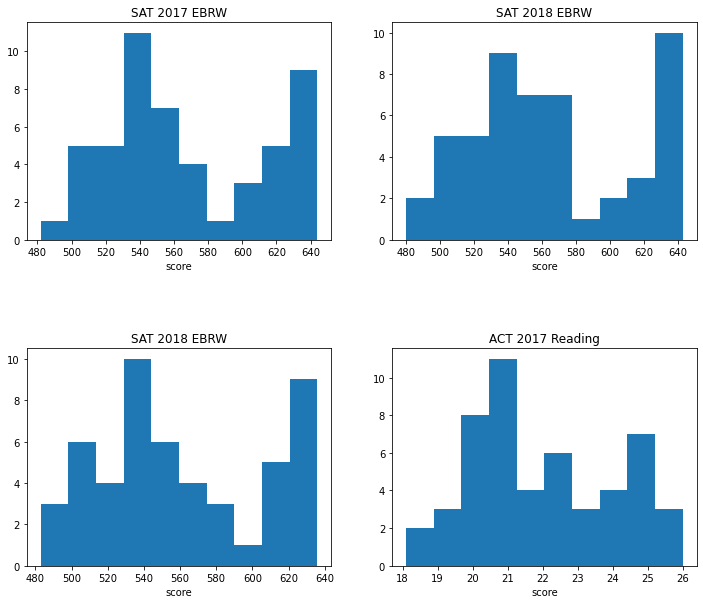

In [66]:
subplot_histograms(final, 
                   list_of_columns=['ebrw_sat_2017','ebrw_sat_2018','ebrw_sat_2019',
                           'reading_act_2017'], 
                   list_of_titles=['SAT 2017 EBRW', 'SAT 2018 EBRW', 'SAT 2018 EBRW',
                                   'ACT 2017 Reading'], 
                   list_of_xlabels=['score', 'score', 'score', 'score']
                   )

**The distributions are consistent and show similar distribitutions across reading and writing scores.**

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


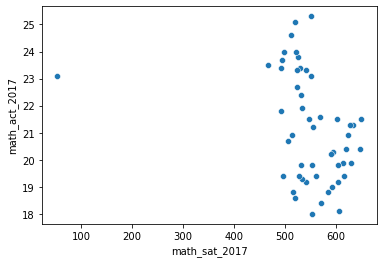

In [67]:
sns.scatterplot(x=final['math_sat_2017'], y=final["math_act_2017"]);

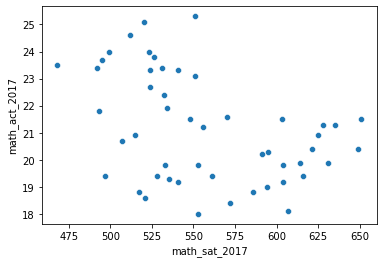

In [68]:
# Code

#scatterplot was impacted heavily by an outlier. we remove this using:
rm_outlier = final['math_sat_2017']
rm_outlier.drop([20], inplace= True)
rm_outlier.reset_index()

#scatterplot
sns.scatterplot(x=rm_outlier, y=final["math_act_2017"]);

**The state of Maryland was an outlier, in which we encountered a value of 52 for the Math SAT score. Removing this, we see that there are no states with very high scores for both tests.**

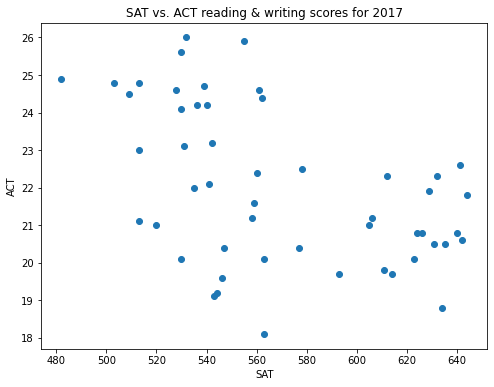

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.ebrw_sat_2017, final.reading_act_2017)
ax.set_title('SAT vs. ACT reading & writing scores for 2017');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

**A similar pattern to the last chart, there are no states that have high scores for both the SAT and ACT in the reading/writing categories One state shows on of the highest ACT scores and has the lowest SAT scores, as similar pattern emerges on the SAT side, with many states with high SAT scores showing very low ACT scores.**

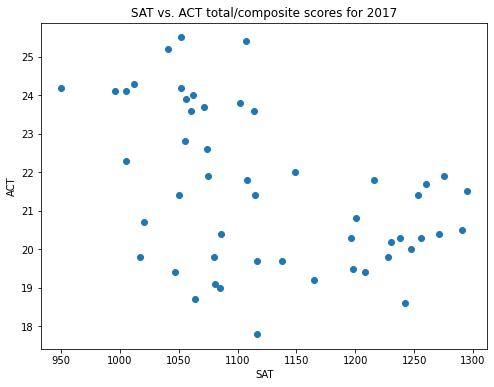

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.total_sat_2017, final.composite_act_2017)
ax.set_title('SAT vs. ACT total/composite scores for 2017');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

**There are no states that have both high total and composite scores for both the SAT and the ACT.**

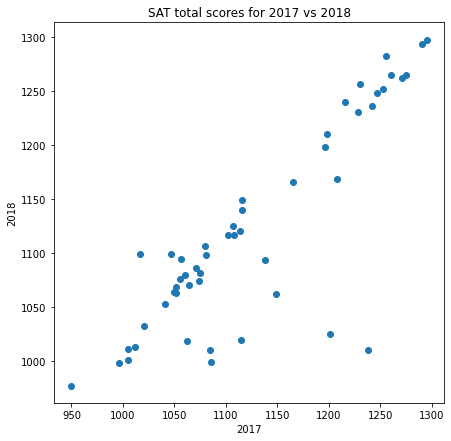

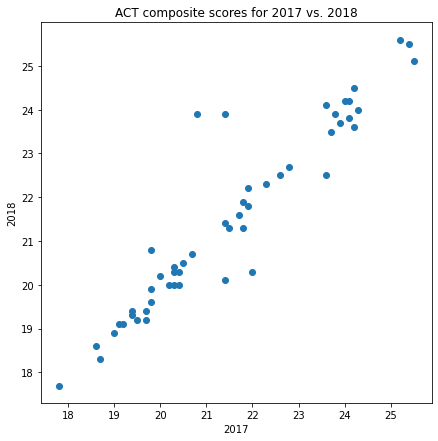

In [71]:
#scatterplot for sat total scores
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.total_sat_2017, final.total_sat_2018)
ax.set_title('SAT total scores for 2017 vs 2018');
ax.set_xlabel('2017')
ax.set_ylabel('2018');

#scatterplot for act total scores
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.composite_act_2017, final.composite_act_2018)
ax.set_title('ACT composite scores for 2017 vs. 2018');
ax.set_xlabel('2017')
ax.set_ylabel('2018');

**Most SAT scores remained relatively constant across 2017 to 2018, with some states SAT total score decreasing.**
**Most ACT scores remained relatively constant across 2017 to 2018. There are 2 outliers where scores increased from 2017 to 2018.**

**generally speaking, states that have a certain range of scores, stay within that range.**

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'ACT Participation Rate 2019')

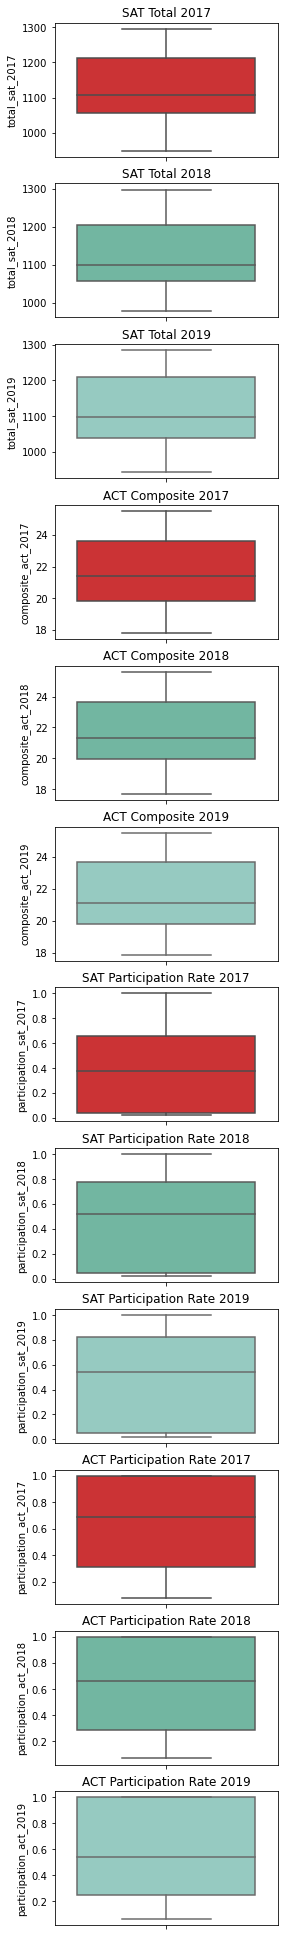

In [72]:
# Code

f, axes = plt.subplots(12, figsize = (4,35))
sns.boxplot(  y="total_sat_2017", data=final,  orient='v' , ax=axes[0], palette = "Set1").set_title('SAT Total 2017')
sns.boxplot(  y="total_sat_2018", data=final,  orient='v' , ax=axes[1], palette = "Set2").set_title('SAT Total 2018')
sns.boxplot(  y="total_sat_2019", data=final,  orient='v' , ax=axes[2], palette = "Set3").set_title('SAT Total 2019')
sns.boxplot(  y="composite_act_2017", data=final,  orient='v' , ax=axes[3], palette = "Set1").set_title('ACT Composite 2017')
sns.boxplot(  y="composite_act_2018", data=final,  orient='v' , ax=axes[4], palette = "Set2").set_title('ACT Composite 2018')
sns.boxplot(  y="composite_act_2019", data=final,  orient='v' , ax=axes[5], palette = "Set3").set_title('ACT Composite 2019')
sns.boxplot(  y="participation_sat_2017", data=final,  orient='v' , ax=axes[6], palette = "Set1").set_title('SAT Participation Rate 2017')
sns.boxplot(  y="participation_sat_2018", data=final,  orient='v' , ax=axes[7], palette = "Set2").set_title('SAT Participation Rate 2018')
sns.boxplot(  y="participation_sat_2019", data=final,  orient='v' , ax=axes[8], palette = "Set3").set_title('SAT Participation Rate 2019')
sns.boxplot(  y="participation_act_2017", data=final,  orient='v' , ax=axes[9], palette = "Set1").set_title('ACT Participation Rate 2017')
sns.boxplot(  y="participation_act_2018", data=final,  orient='v' , ax=axes[10], palette = "Set2").set_title('ACT Participation Rate 2018')
sns.boxplot(  y="participation_act_2019", data=final,  orient='v' , ax=axes[11], palette = "Set3").set_title('ACT Participation Rate 2019')


***Box plots are color coded. Red for 2017, Green for 2018, Blue for 2019.***

**We can see that ACT participation is concentrated in the higher end, whilst SAT participation rates are concentrated in the lower end. The scores seem to be evenly distributed in the center.**

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [73]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
ebrw_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


<AxesSubplot:title={'center':'SAT Scores'}, ylabel='Score'>

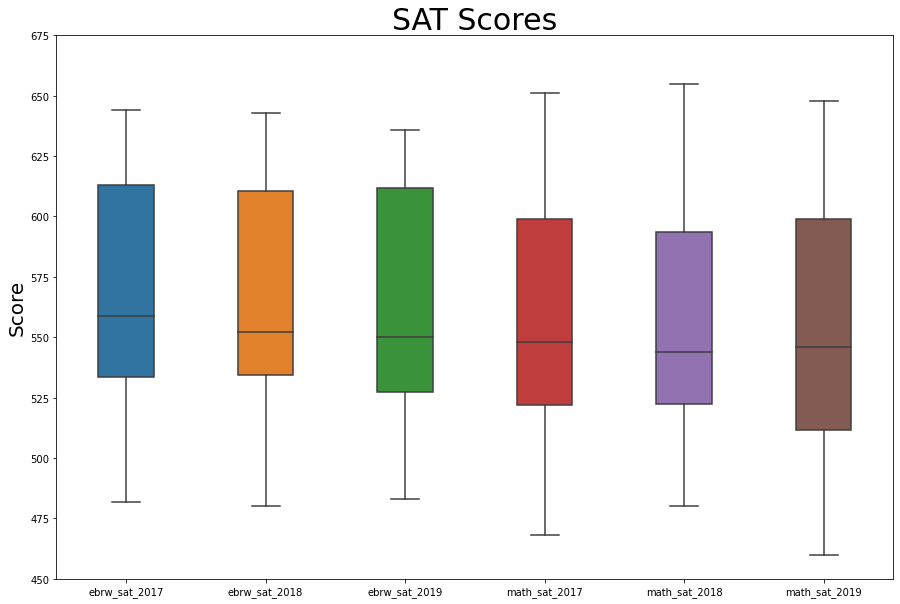

In [74]:
ax = plt.subplots(figsize=(15,10))
plt.title('SAT Scores',fontsize=30)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
sns.boxplot(data=final[['ebrw_sat_2017','ebrw_sat_2018','ebrw_sat_2019',
                        'math_sat_2017', 'math_sat_2018', 'math_sat_2019']],width=0.4)

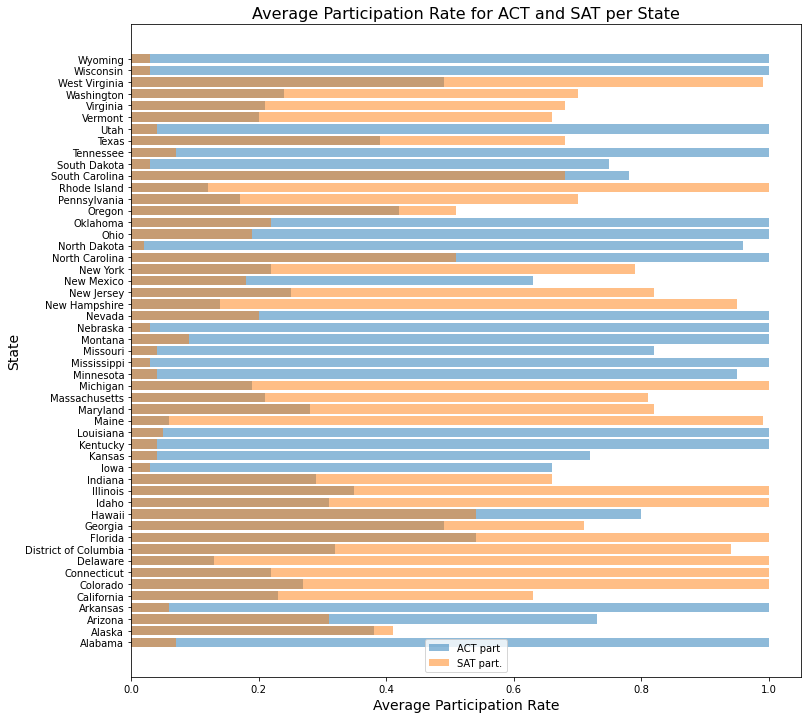

In [75]:
plt.subplots(figsize=(12,12)) 
# set  canvas for plotting 
plt.barh(final.state, final.participation_act_2019, label='ACT part', alpha=0.5) 
# make a bar graph 
plt.barh(final.state, final.participation_sat_2019, label='SAT part.', alpha=0.5) 
plt.legend(loc='lower center') 
plt.title("Average Participation Rate for ACT and SAT per State", fontsize=16) 
plt.xlabel("Average Participation Rate", fontsize=14) 
plt.ylabel("State",fontsize=14) 
plt.show()


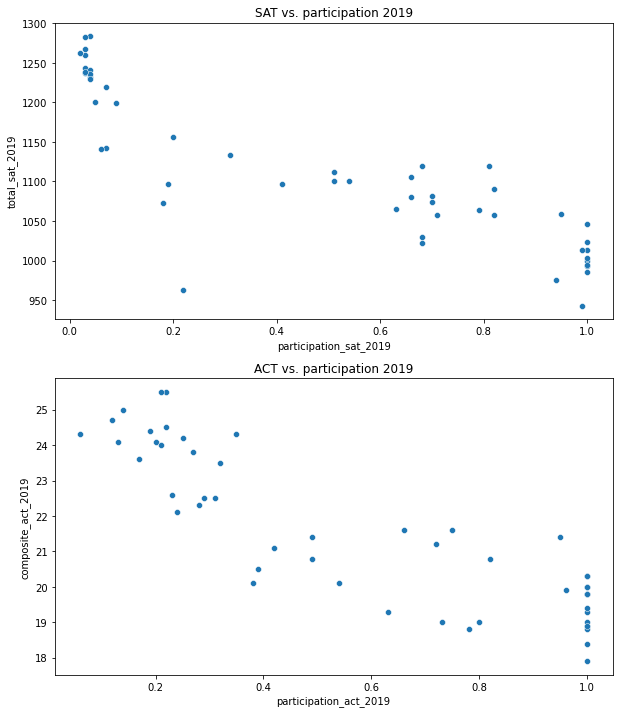

In [76]:
f, axes = plt.subplots(2, figsize = (10, 12))
sns.scatterplot(data = final, x = "participation_sat_2019", y = "total_sat_2019", ax=axes[0]).set_title('SAT vs. participation 2019');
sns.scatterplot(data = final, x = "participation_act_2019", y = "composite_act_2019", ax=axes[1]).set_title('ACT vs. participation 2019');

In [77]:
#all states with free sat tests
free_state_SAT = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 
                'Idaho', 'Illinois', 'Maine', 'Michigan', 'New Hampshire', 
                'Ohio', 'Oklahoma', 'Rhode Island', 'South Carolina', 'Tennesee', 
                'West Virginia']
free = final['state'].isin (free_state_SAT)


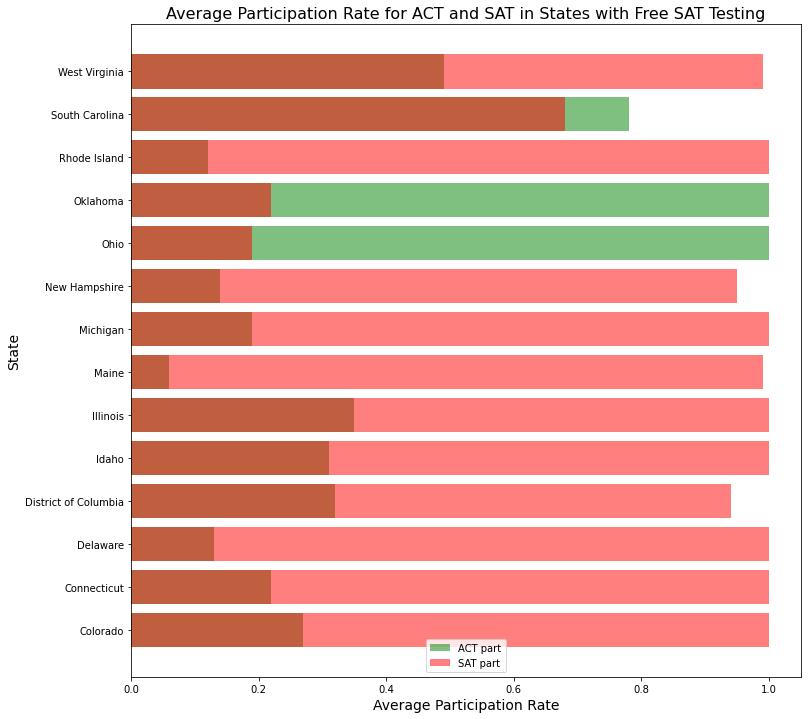

In [78]:
plt.subplots(figsize=(12,12)) 
# set  canvas for plotting 
plt.barh(final[free].state, final[free].participation_act_2019, label='ACT part', color = 'green', alpha=0.5) 
# make a bar graph 
plt.barh(final[free].state, final[free].participation_sat_2019, label='SAT part', color = 'red', alpha=0.5) 
plt.legend(loc='lower center') 
plt.title("Average Participation Rate for ACT and SAT in States with Free SAT Testing", fontsize=16) 
plt.xlabel("Average Participation Rate", fontsize=14) 
plt.ylabel("State",fontsize=14) 
plt.show()


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [79]:
final.loc[final['state'] == 'Maine']

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,participation_sat_2019,ebrw_sat_2019,math_sat_2019,total_sat_2019,participation_act_2019,composite_act_2019
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,501,1013,0.07,24.0,0.99,512,502,1013,0.06,24.3


In [80]:
final.loc[final['state'] == 'Colorado']

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,participation_sat_2019,ebrw_sat_2019,math_sat_2019,total_sat_2019,participation_act_2019,composite_act_2019
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,...,506,1025,0.3,23.9,1.0,518,506,1024,0.27,23.8


In [81]:
final.loc[final['state'] == 'Oregon']

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,participation_sat_2019,ebrw_sat_2019,math_sat_2019,total_sat_2019,participation_act_2019,composite_act_2019
37,Oregon,0.43,560,548,1108,0.4,21.2,21.5,22.4,21.7,...,553,1117,0.42,21.3,0.51,562,550,1112,0.42,21.1


**1. Colorado**

Colorado went from an extremely low 0.11 in SAT participation rates in 2017, before skyrocketing to 1.0 participation rates in 2018. A jump of 0.89 within one year. Alternatively, the opposite happened with the ACT rates.. going from 1.0 in 2017 to 0.3 in 2018. A drop of 0.97.

**2. Maine**

Consistently maintains extremely low rates in the ACT. Never going above 0.08, and dropping by 0.01 every year.

**3. Oregon**

Nearly has less than 0.50 on both SAT and ACT rates, with 0.51 SAT participation rate and 0.42 ACT participation rates respecitivelly. State seems to not yet have an understanding of which test to prioritize, and is having trouble getting 1.00 participation in total. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Key Recommendations:
Collect more data. For example, math without a calculator would be more correlated with a student’s natural ability, whereas scores of math without a calculator would be more correlated with rote memorization. If we see lower scores without a calculator than we would see that the problem likely has to do with teaching, and systems within the school system than a population’s natural ability. 
If possible, collect more data about the students themselves, and their personal data. Including what classes they took, which schools they are in, proximity of universities, average income, etc.

Key takeaways:

1. ACT participation is higher than SAT.

2. Government and educational policy has a major impact on participation rates.

3. Analysis would improve with greater and more specific data collection.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 